In [1]:
import sys
sys.path.append("/storage/vbutoi/projects/")
sys.path.append("/storage/vbutoi/libraries/")
from ionpy.analysis import ResultsLoader
import pathlib
import seaborn as sns
import pandas as pd
sns.set_context('talk')

sns.set_style("darkgrid")

import os 
os.environ['DATAPATH'] = ':'.join((
       '/storage',
))

# Results loader object does everything
rs = ResultsLoader()
root = "/storage/vbutoi/scratch/ESE"

In [2]:
path_list = [
    # "/storage/vbutoi/scratch/ESE/training/08_24_24_HeptaticVessel_LowerLR",
    "/storage/vbutoi/scratch/ESE/calibration/08_24_24_HepaticVessels_Cal_Pilot",
]

df_list = []
for path in path_list:
    try:
        dfc = rs.load_configs(
            path,
            properties=False,
        )
        df = rs.load_metrics(dfc)
        df_list.append(df)
    except Exception as e:
        print(e)
df = pd.concat(df_list)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

In [3]:
for ikey in df.keys():
    print(ikey)

phase
epoch
loss
area_estimation_error
dice_score
ece_loss
data
iters_per_epoch
label
resolution
root_folder
task
train_splits
val_splits
batch_size
num_workers
pin_memory
seed
loss_func
batch_reduction
from_logits
model
image_channels
num_classes
optim
lr
weight_decay
base_checkpoint
base_pretrained_dir
base_pt_select_metric
epochs
eval_freq
path


In [4]:
df['path'].unique()

array([PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_24_24_HepaticVessels_Cal_Pilot/20240824_155033-I0R8-ac27484fc41c94b52aae37fcc240c4a7'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_24_24_HepaticVessels_Cal_Pilot/20240824_122737-GHPH-2aedd5612119f1b02baf0374eecff180'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_24_24_HepaticVessels_Cal_Pilot/20240824_122754-TI50-473644792e80bf28c2ce45fa01e883c8'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_24_24_HepaticVessels_Cal_Pilot/20240824_122741-G4WA-739d49b60a4accc3a56a4aafa97ec7fd'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_24_24_HepaticVessels_Cal_Pilot/20240824_155037-N4G5-8fc2585d64353b5d753edfa3ac6c9a4e'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_24_24_HepaticVessels_Cal_Pilot/20240824_155050-0SDU-d636683b99b4e953ef8e61751ebeb549'),
       PosixPath('/storage/vbutoi/scratch/ESE/calibration/08_24_24_HepaticVessels_Cal_Pilot/20240824_15502

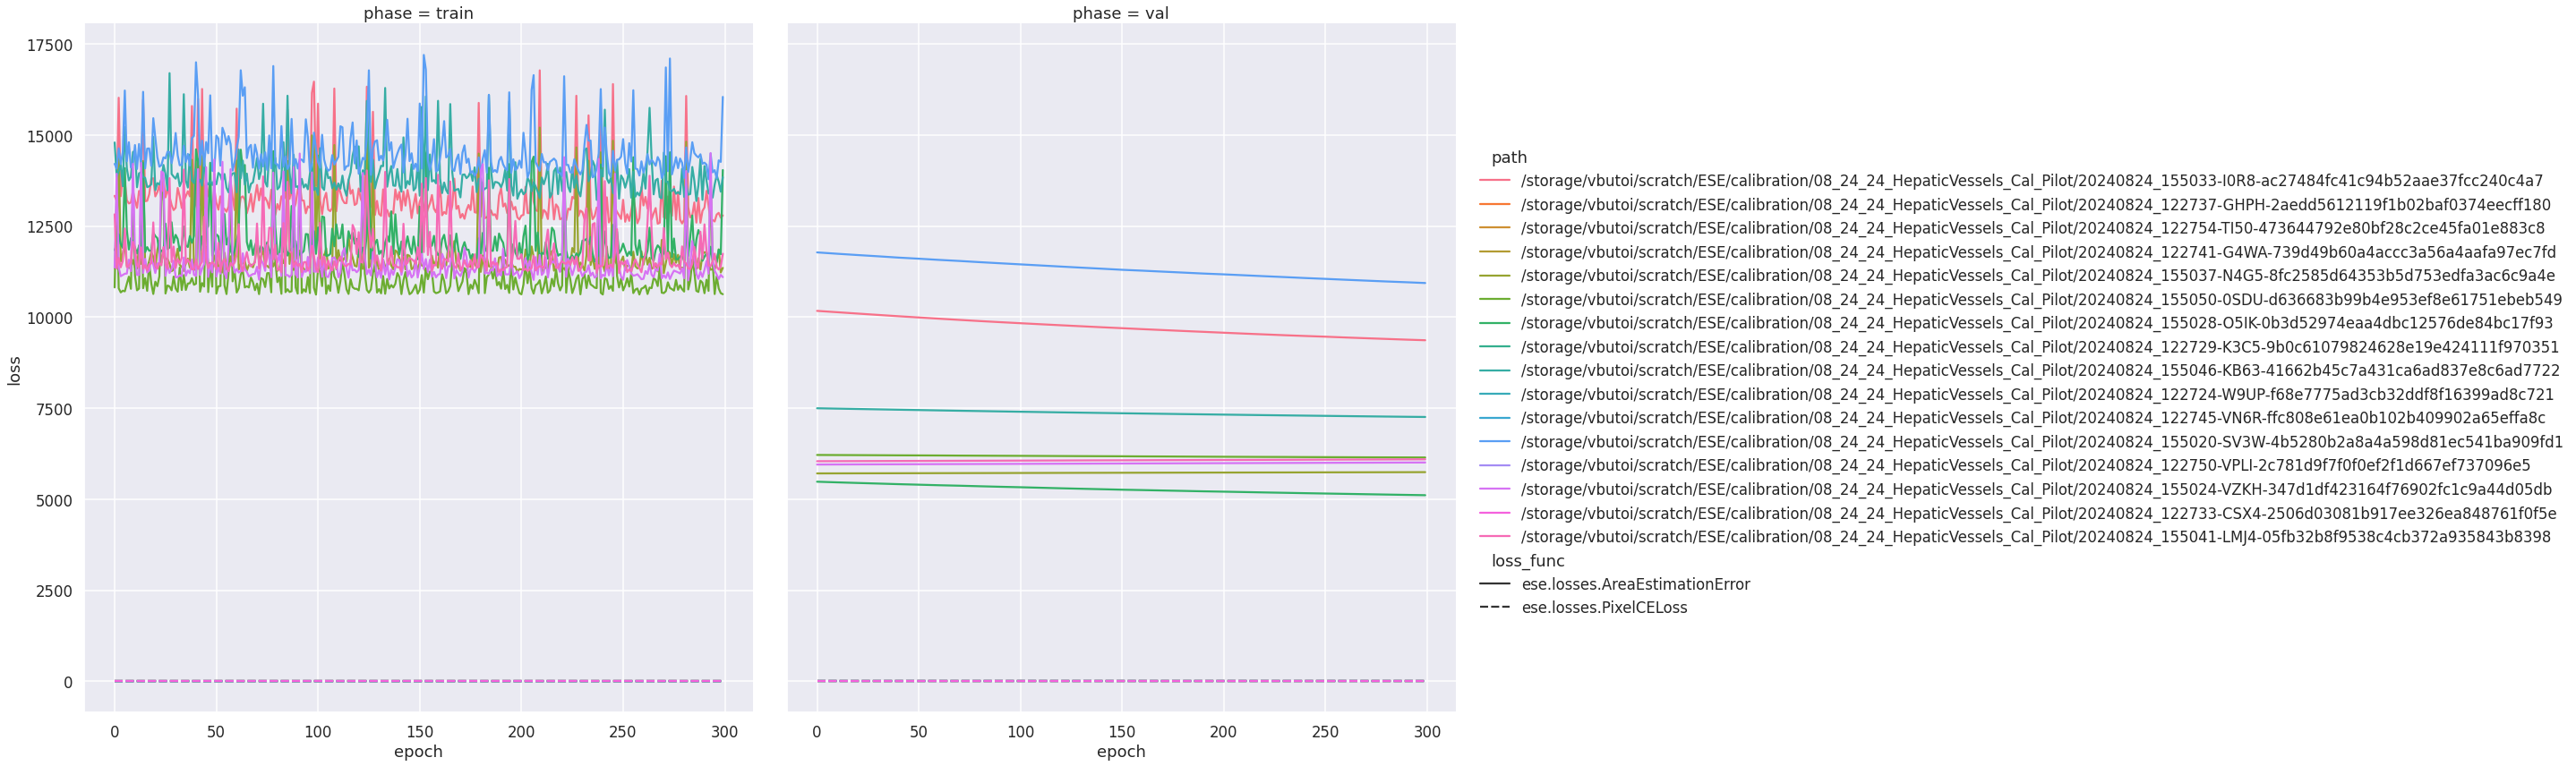

In [5]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='loss',
    hue='path',
    style='loss_func',   
    col='phase',
    kind='line',
    height=12,
)

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
# g.set(ylim=(0.0, 0.25))

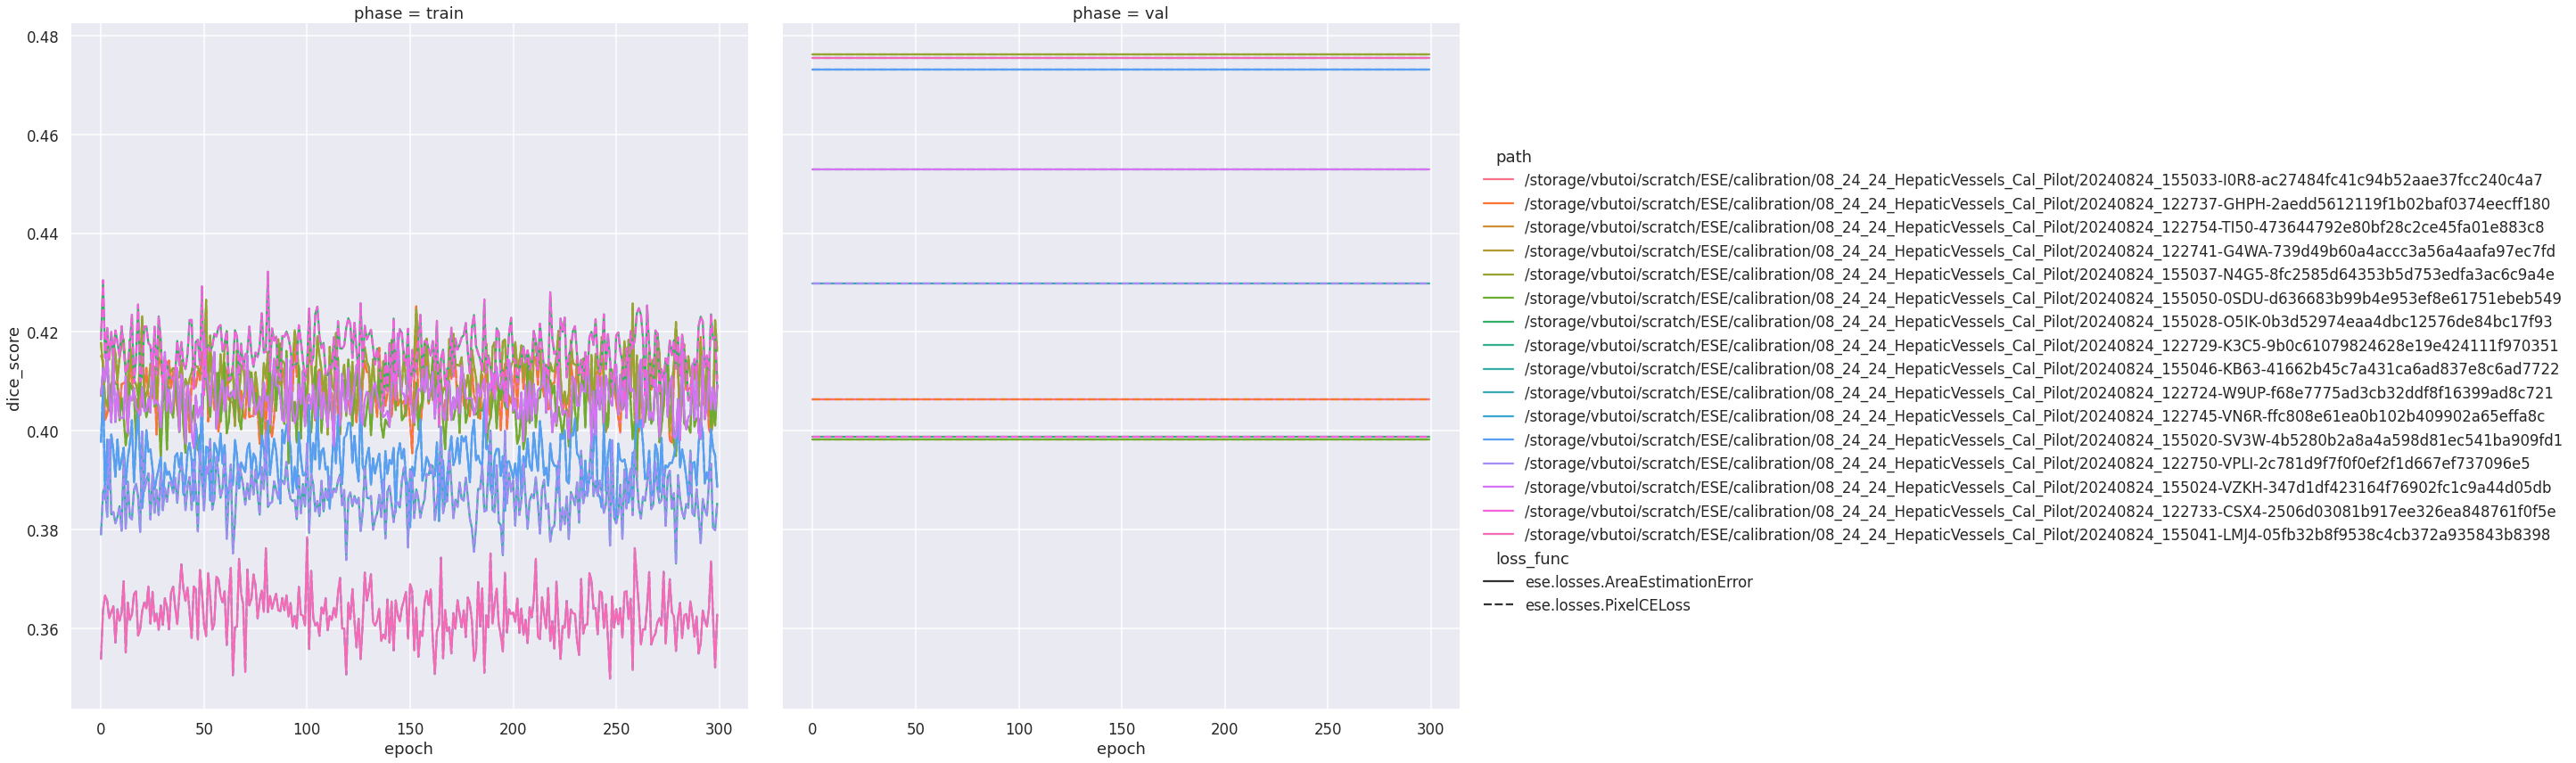

In [6]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='dice_score',
    hue='path',
    style='loss_func',   
    col='phase',
    kind='line',
    height=12,
    # palette=custom_palette
)

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
# g.set(ylim=(0.0, 0.25))

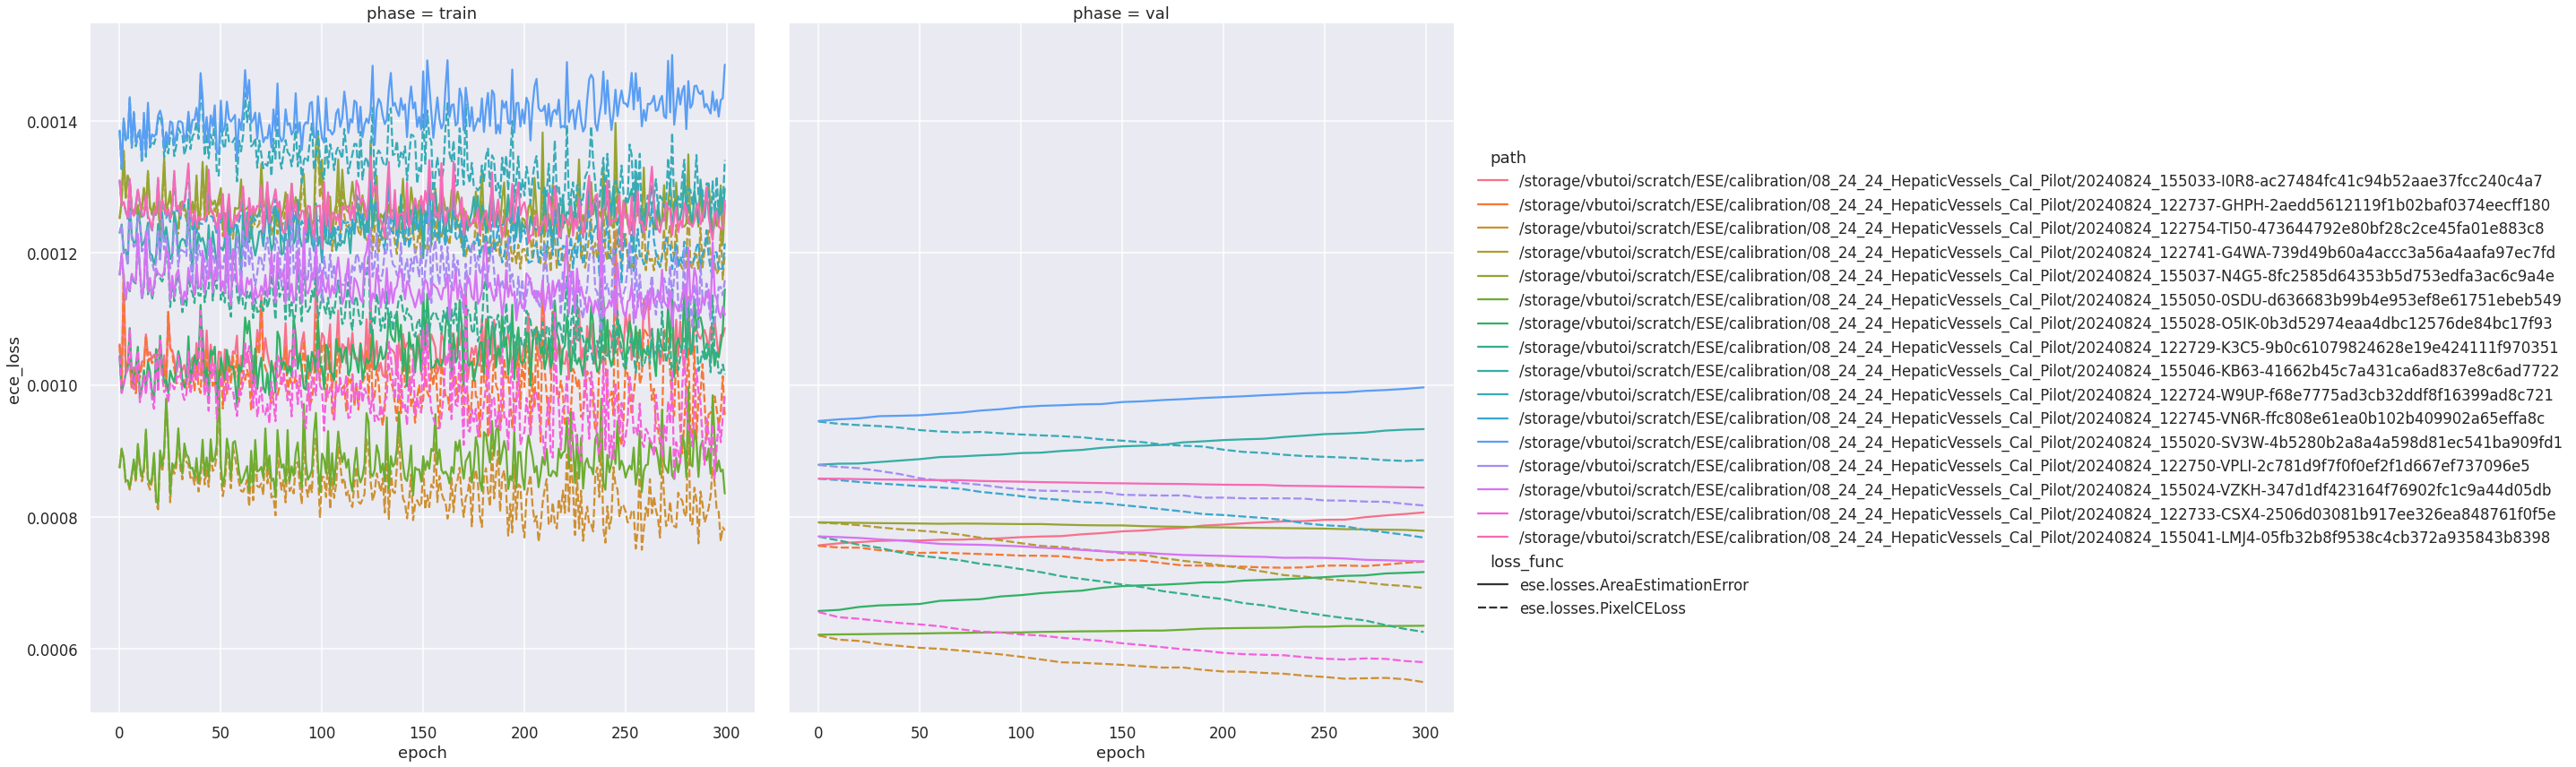

In [8]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='ece_loss',
    hue='path',
    style='loss_func',   
    col='phase',
    kind='line',
    height=12,
    # palette=custom_palette
)

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
# g.set(ylim=(0.0, 0.25))

In [7]:
# g = sns.relplot(
#     data=df,
#     x='epoch',
#     y='area_estimation_error',
#     hue='path',
#     style='loss_func',   
#     col='phase',
#     kind='line',
#     height=12,
#     # palette=custom_palette
# )

# # Set column spacing
# g.fig.subplots_adjust(wspace=0.05)
# # g.set(ylim=(0.0, 0.25))